# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
def roll_die():
    lst=[]
    outcome=[1, 2, 3, 4, 5, 6]
    for i in range(1, 11):
        lst.append(random.choice(outcome))
    df=pd.DataFrame(list(zip(range(1, 11), lst)), columns=['Rolls', 'Outcomes'])
    df.set_index(['Rolls'], inplace=True)
    return (df)
df2=roll_die()

In [4]:
df2

,Outcomes
Rolls,
1,5
2,4
3,4
4,4
5,3
6,2
7,1
8,5
9,4


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

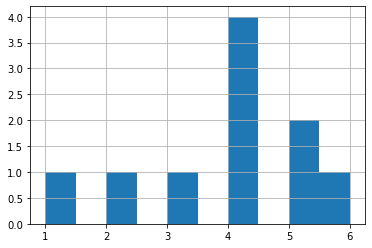

In [5]:
df2['Outcomes'].sort_values().hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
df3=pd.DataFrame(df2.value_counts())

df3.columns=['freq']
df3.reset_index(inplace=True)
df3

,Outcomes,freq
0,4,4
1,5,2
2,1,1
3,2,1
4,3,1
5,6,1


Text(0, 0.5, 'Frequency')

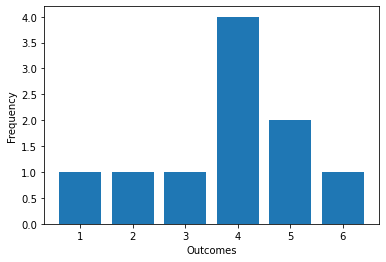

In [7]:
plt.bar(df3.Outcomes, df3.freq)
plt.xlabel('Outcomes')
plt.ylabel('Frequency')

In [ ]:
"""
The two plots show us the same results. Histogram above also shows the count of outcomes, same as what we calculated
for the frequencies of each outcome.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean(x):
    return sum(x)/len(x)
        
mean_df2=df2.apply(mean)
mean_df2

Outcomes    3.8
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
sum(df3.Outcomes*df3.freq)/sum(df3.freq)


3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [17]:
def median(l):
    half = len(l) // 2
    l.sort()
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]

In [18]:
lst=[2, 3, 4, 5, 6]
median(lst)

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [24]:
def quartiles(q):
   # check the input is not empty
    if not q:
        raise StatsError('no data points passed')
   # 1. order the data set
    sorted_d = sorted(q)
   # 2. divide the data set in two halves
    mid = len(sorted_d) // 2 # uses the floor division to have integer returned
    
    if (len(sorted_d) % 2 == 0):
   # even
        lowerQ = median(sorted_d[:mid])
        upperQ = median(sorted_d[mid:])
    else:
   # odd
        lowerQ = median(sorted_d[:mid])  # same as even
        upperQ = median(sorted_d[mid+1:])
    return (lowerQ, upperQ)

In [25]:
quartiles(lst)

(2.5, 5.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

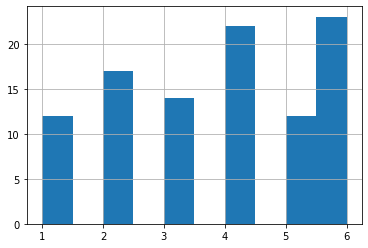

In [26]:
rolls=pd.read_csv('/Users/ildem/Desktop/Lab_4_Descriptive-Statistics/roll_the_dice_hundred.csv')
rolls['value'].sort_values().hist()

In [ ]:
"""
Out of 100 rolls, the most frequently observed values are 4 and 6 with more than 20 times. 2 was observed more than 
15 times and other numbers between 10 and 15 times.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [27]:
rolls[['value']].apply(mean)

value    3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [28]:
rolls_fr=pd.DataFrame(rolls['value'].value_counts())
rolls_fr

,value
6,23
4,22
2,17
3,14
1,12
5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

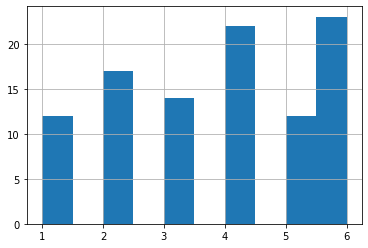

In [29]:
rolls['value'].hist()

In [ ]:
"""
<Similar to the histogram we obtained previously, we see that 4 and 6 are most frequent numbers occuring more than 20
times. It seems more or less evenly distributed, which we also see from the mean close to the mid point of the curve.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

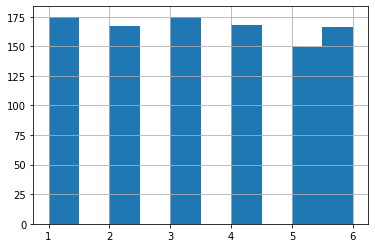

In [30]:
rolls_1000=pd.read_csv('/Users/ildem/Desktop/Lab_4_Descriptive-Statistics/roll_the_dice_thousand.csv')
rolls_1000['value'].sort_values().hist()

In [ ]:
"""
The frequency of each number has become closer to each other. As we increase the number of observations, we get a better
representation of the equal probability of each number.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:>

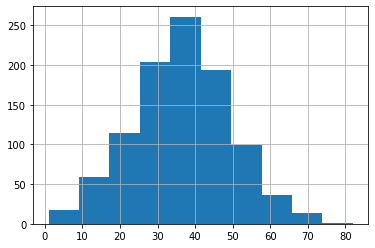

In [162]:
ages=pd.read_csv('/Users/ildem/Desktop/Lab_4_Descriptive-Statistics/ages_population.csv')
ages['observation'].sort_values().hist()

In [ ]:
#mean should be near 40 and std should be around 10.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [165]:
ages.mean()


observation    36.56
dtype: float64

In [166]:
ages.std()

observation    12.8165
dtype: float64

In [ ]:
"""
The values are close to those I guessed. Mean value corresponds to the peak of the histogram as it is a normal 
distribution. 68% of the observations would fall in 1 standard deviation around the mean so I guessed it to 
be around 10.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:>

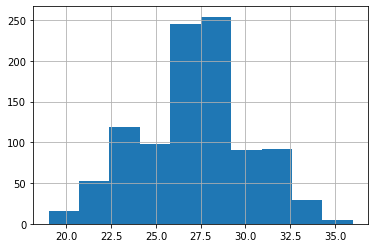

In [168]:
ages2=pd.read_csv('/Users/ildem/Desktop/Lab_4_Descriptive-Statistics/ages_population2.csv')
ages2['observation'].sort_values().hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Here there is sharper difference between the values in the middle of the histogram and the values surounding the 
midpoint.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [169]:
ages2.mean()

observation    27.155
dtype: float64

In [170]:
ages2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
Both mean and standard deviation are smaller than the first sample. The range of values si smeller here which explains
the smaller standard deviation.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:>

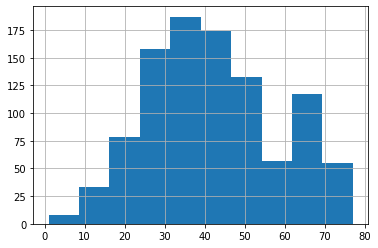

In [31]:
ages3=pd.read_csv('/Users/ildem/Desktop/Lab_4_Descriptive-Statistics/ages_population3.csv')
ages3['observation'].sort_values().hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
ages3.mean()

observation    41.989
dtype: float64

In [33]:
ages3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
There are more values on the right side of the histogram which results in a higher mean value. We have here a wider range
of ages which gives a greater standard deviation.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [34]:
ages3.quantile([0.25,0.5,0.75, 1])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [ ]:
"""
Median is 40.0, mean is 41.989. The difference between them is about 2. As explained in step 2, because of the higher
frequency of values on the right side of the graph, mean is more towards the right of the graph.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
ages3.quantile([0.2,0.4,0.6,0.8,0.9, 1])

,observation
0.2,28.0
0.4,36.0
0.6,45.0
0.8,57.0
0.9,67.0
1.0,77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""